# Assignment 3 : Naive Bayes

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The key task is to determine whether a person makes over $50K a year, adult.csv contains the dataset required to solve the task.

Dataset Description

|Variable      |Definition               |Key                                                                                                                                                                                                                     |
|--------------|-------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|age           |Age                      |Continuous                                                                                                                                                                                                              |
|workclass     |Work class               |Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked                                                                                                                   |
|fnlwgt        |                         |Continuous                                                                                                                                                                                                              |
|education     |Level of education       |Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool                                                                   |
|education-num |No. of years of education|Continuous                                                                                                                                                                                                              |
|marital-status|Marital status           |Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse                                                                                                               |
|Occupation    |Occupation               |Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|relationship  |Relationship             |Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried                                                                                                                                                      |
|race          |Race                     |White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black                                                                                                                                                             |
|sex           |Gender                   |Female, Male                                                                                                                                                                                                            |
|capital-gain  |Capital gain             |Continuous                                                                                                                                                                                                              |
|capital-loss  |Capital loss             |Continuous                                                                                                                                                                                                              |
|hours-per-week|Working hours / week     |continuous                                                                                                                                                                                                              |
|native-country|Native Country           |United-States, Cambodia, England . . .                                                                                                                                                                                  |


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter

import seaborn as sns
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_excel("adult.xlsx") #, names=['age', 'workclass', 'fnlwgt',  'level_education','yrs_education', 'marital_status', 'occupation','relationship','race', 'sex', 'capital_gain','capital_loss','hrs_per_week','native_country','salary'], header=None)
df

,age,workclass,fnlwgt,level_education,yrs_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
profile = ProfileReport(df, title="Pandas Profiling Report")


In [3]:
# profile.to_file("naive_bayes.html")

### Related Columns

- sex --> relationship
- salary --> relationship
- marital_status --> Age, relationship
- Age --> marital_status
- relationship --> marital_status, sex, salary


- workclass --> occupation
- yrs_education --> level_education
- level_education --> yrs_education, occupation
- occupation --> workclass, level_education


- race --> native_country
- native_country --> race


- capital_gain has 29849 (91.7%) zeros	Zeros
- capital_loss has 31042 (95.3%) zeros	Zeros

In [4]:
df['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [5]:
df['salary'].replace([' <=50K'], 0, inplace=True)
df['salary'].replace([' >50K'], 1, inplace=True)

In [6]:
group1_df = df[['age','sex','relationship','marital_status','salary']]
group1_df

,age,sex,relationship,marital_status,salary
0,39,Male,Not-in-family,Never-married,0
1,50,Male,Husband,Married-civ-spouse,0
2,38,Male,Not-in-family,Divorced,0
3,53,Male,Husband,Married-civ-spouse,0
4,28,Female,Wife,Married-civ-spouse,0
...,...,...,...,...,...
32556,27,Female,Wife,Married-civ-spouse,0
32557,40,Male,Husband,Married-civ-spouse,1
32558,58,Female,Unmarried,Widowed,0
32559,22,Male,Own-child,Never-married,0


In [7]:
group1_df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [8]:
group1_df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'level_education', 'yrs_education',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'salary'],
      dtype='object')

In [10]:
# df.age = df.age.astype(float)
df['hrs_per_week'] = df['hrs_per_week'].astype(float)

In [11]:
# sns.heatmap(group1_df.corr(), cmap="YlGnBu", annot = True)

In [12]:
df['yrs_education']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: yrs_education, Length: 32561, dtype: int64

In [13]:
df['level_education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th'], 'Dropped', inplace=True)
df['level_education'].replace([' HS-grad', ' Assoc-acdm',' Assoc-voc',], 'HighSchool', inplace=True)
df['level_education'].replace([' Some-college'], 'College', inplace=True)
df['level_education'].replace([' Bachelors', ' Prof-school'], 'Bachelors', inplace=True)
df['level_education'].replace([' Masters'], 'Masters', inplace=True)
df['level_education'].replace([' Doctorate'], 'Doctorate', inplace=True)

In [14]:
df['level_education'].unique()

array(['Bachelors', 'HighSchool', 'Dropped', 'Masters', 'College',
       'Doctorate'], dtype=object)

In [15]:
df[['level_education', 'yrs_education']].groupby(['level_education'], as_index=False).count().sort_values(by='yrs_education', ascending=True)

,level_education,yrs_education
2,Doctorate,413
5,Masters,1723
3,Dropped,4253
0,Bachelors,5931
1,College,7291
4,HighSchool,12950


<AxesSubplot:xlabel='count', ylabel='level_education'>

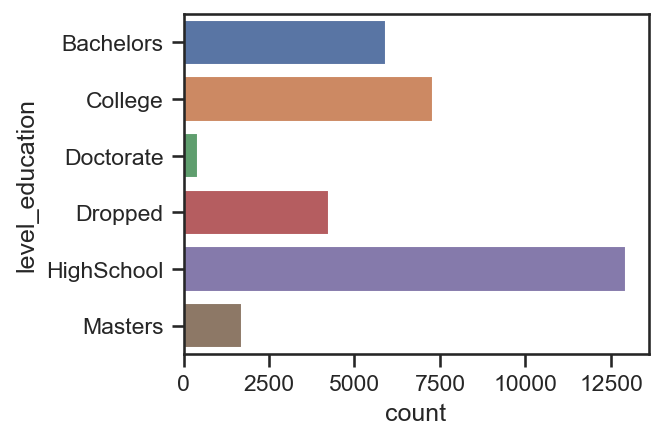

In [16]:
fig = plt.figure(figsize=(4,3))
# plt.style.use('seaborn-ticks')
sns.countplot(y="level_education", data=df.sort_values(by=['level_education']))

### Group marital status into Single, Married, Separated, Widowed

In [17]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [18]:
df['marital_status'].replace([' Never-married'], 'Single',inplace=True)
df['marital_status'].replace([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse'], 'Married',inplace=True)
df['marital_status'].replace([' Separated'], 'Separated',inplace=True)
df['marital_status'].replace([' Divorced'], 'Divorced',inplace=True)
df['marital_status'].replace([' Widowed'], 'Widowed',inplace=True)
df['marital_status'].unique()

array(['Single', 'Married', 'Divorced', 'Separated', 'Widowed'],
      dtype=object)

In [19]:
df['marital_status'].value_counts()

Married      15417
Single       10683
Divorced      4443
Separated     1025
Widowed        993
Name: marital_status, dtype: int64

                salary  Total
marital_status               
Divorced           463   4443
Married           6736  15417
Separated           66   1025
Single             491  10683
Widowed             85    993


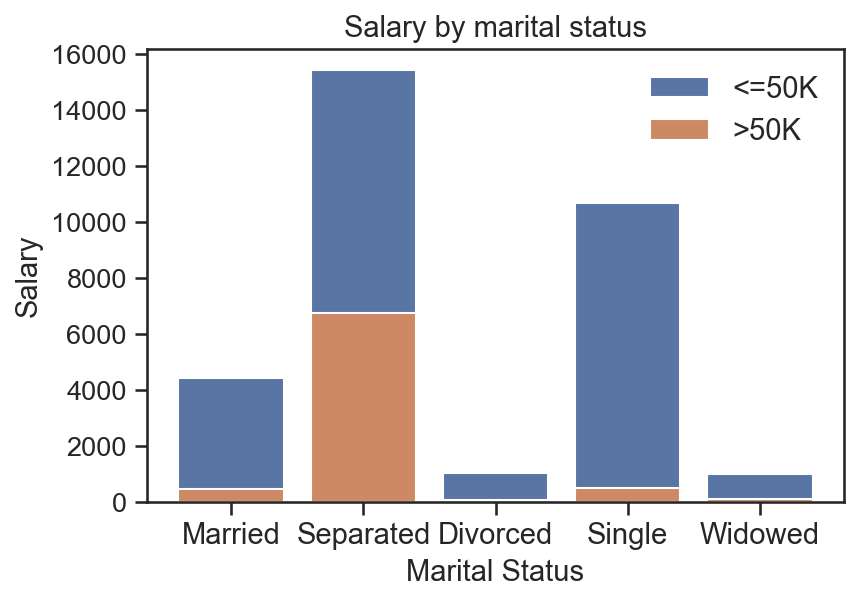

In [20]:
marital_salary= df.groupby('marital_status')['salary']
maritalsal_total = marital_salary.sum()
maritalsal_total.name = 'salary'
# print(maritalsal_total)

maritalsal_count = marital_salary.size()
maritalsal_count.name= 'Total'
# print(maritalsal_count)

marital_salary_total_count = pd.concat([maritalsal_total,maritalsal_count],axis=1)
print(marital_salary_total_count)

x = marital_salary_total_count.index.values
ht = marital_salary_total_count.Total
hs = marital_salary_total_count.salary

fig, ax = plt.subplots()
pht = plt.bar(x, ht, color="#5975A4")
phs = plt.bar(x, hs, color="#CC8963")

plt.xticks(x, x)
ax.set_yticklabels(np.arange(0,18000,2000),fontsize=13)
ax.set_xticklabels(['Married', 'Separated', 'Divorced', 'Single', 'Widowed'], fontsize=14)
plt.xlabel('Marital Status', size=14)
plt.ylabel('Salary', size=14)
plt.title('Salary by marital status', size=14)


plt.legend([pht,phs],['<=50K', '>50K'],fontsize=14,frameon=False)
# plt.show()

# plt.savefig("Survivors_by_Class.png")

In [21]:
df[['yrs_education','level_education']]

,yrs_education,level_education
0,13,Bachelors
1,13,Bachelors
2,9,HighSchool
3,7,Dropped
4,13,Bachelors
...,...,...
32556,12,HighSchool
32557,9,HighSchool
32558,9,HighSchool
32559,9,HighSchool


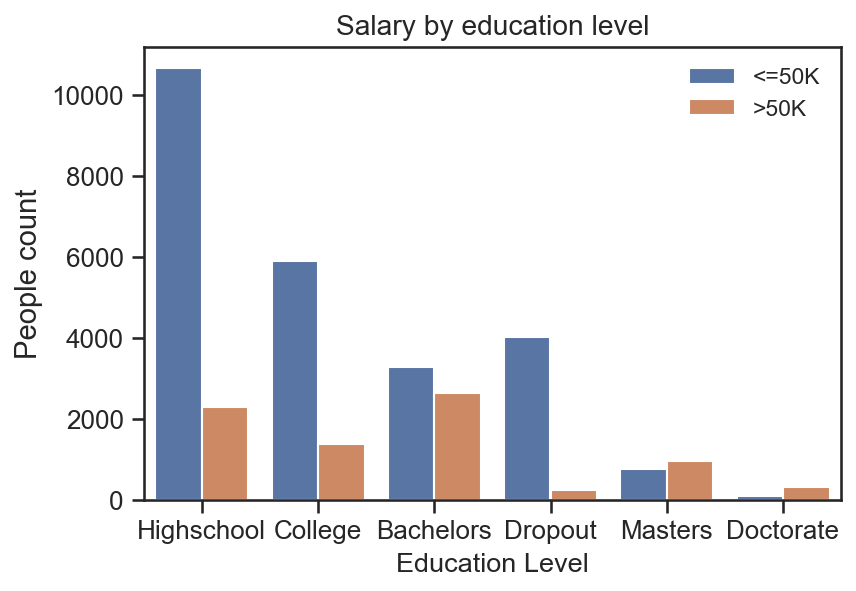

In [22]:
# plt.figure(figsize=(15,7))
sns.color_palette("colorblind")
ax=sns.countplot(df['level_education'],hue=df['salary'], order=df['level_education'].value_counts().index)
plt.xlabel('Education Level', size=13)
plt.ylabel('People count', size=14)
plt.title('Salary by education level', size=13.5)
ax.set_yticklabels(np.arange(0,12000,2000),fontsize=12.5)
ax.set_xticklabels(['Highschool','College','Bachelors','Dropout','Masters','Doctorate'],size =12.5, rotation=0)
plt.legend(['<=50K', '>50K'],frameon=False)

### Categorizing Native countries

In [23]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
df['native_country'].nunique()

42

In [25]:
asian = [' Laos', ' Cambodia', ' China',' Hong',' India',' Japan',' Philippines',' South',' Taiwan',
         ' Thailand',' Vietnam',' Iran']
european = [' Greece',' Portugal',' England',' Ireland',' Scotland',' France',' Germany',' Holand-Netherlands', ' Hungary',' Yugoslavia',' Italy', ' Poland']
north_american = [' Haiti',' Cuba',' Mexico',' Honduras',' Puerto-Rico',' Canada',' Guatemala',' Dominican-Republic',
                  ' El-Salvador', ' Jamaica',' Nicaragua', ' Outlying-US(Guam-USVI-etc)']
south_american = [' Peru',' Columbia',' Trinadad&Tobago',' Ecuador']
other = [' ?']
# africa = [' Greece']

In [26]:
total = set(asian+european+other+north_american+south_american)
set(df['native_country'].unique())-total

{' United-States'}

In [27]:
df['native_country'].replace(asian, 'Asian',inplace=True)
df['native_country'].replace(north_american, 'North American',inplace=True)
df['native_country'].replace(south_american, 'South American',inplace=True)
df['native_country'].replace(european, 'European',inplace=True)
df['native_country'].replace(other, 'Other countries',inplace=True)
df['native_country'].replace(' United-States', 'United States',inplace=True)
df['native_country'].unique()

array(['United States', 'North American', 'Asian', 'Other countries',
       'European', 'South American'], dtype=object)

In [28]:
df['native_country'].unique()

array(['United States', 'North American', 'Asian', 'Other countries',
       'European', 'South American'], dtype=object)

In [29]:
continent_salary= df.groupby('native_country')['salary']
continentsal_total = continent_salary.sum()
continentsal_total.name = 'salary'
# print(maritalsal_total)

continentsal_count = continent_salary.size()
continentsal_count.name= 'Total'
# print(maritalsal_count)

continent_salary_total_count = pd.concat([continentsal_total, continentsal_count],axis=1)
print(continent_salary_total_count)

                 salary  Total
native_country                
Asian               222    751
European            152    521
North American      140   1399
Other countries     146    583
South American       10    137
United States      7171  29170


In [30]:
continent_salary_total_count[:5]

,salary,Total
native_country,,
Asian,222,751
European,152,521
North American,140,1399
Other countries,146,583
South American,10,137


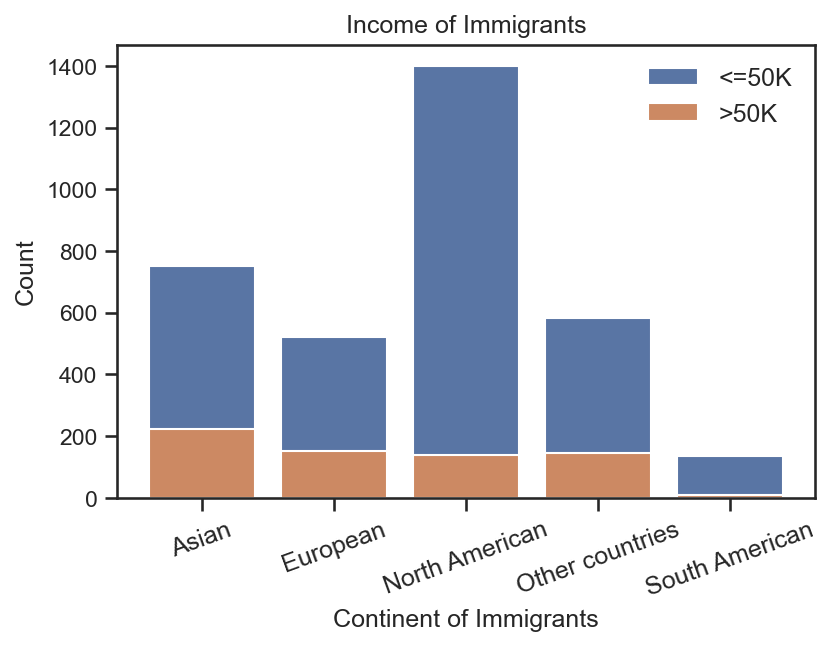

In [31]:

x = continent_salary_total_count[:5].index.values
ht = continent_salary_total_count[:5].Total
hs = continent_salary_total_count[:5].salary

fig, ax = plt.subplots()
pht = plt.bar(x, ht, color="#5975A4")
phs = plt.bar(x, hs, color="#CC8963")

plt.xticks(x, x)
# ax.set_yticklabels(np.arange(0,18000,2000),fontsize=14)
ax.set_xticklabels(['Asian', 'European', 'North American', 'Other countries', 'South American'], fontsize=12,rotation=20)
plt.xlabel('Continent of Immigrants', size=12)
plt.ylabel('Count', size=12)
plt.title('Income of Immigrants', size=12)


plt.legend([pht,phs],['<=50K', '>50K'], fontsize=12,frameon=False)
# plt.show()

# plt.savefig("Survivors_by_Class.png")

### Age group wise salary

In [32]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if ( 15 < x <=20 ):
        return "17-20"
    if ( 20 < x < 31 ):
        return "21-30"
    if ( 30 < x < 41 ):
        return "31-40"
    if ( 40 < x < 51 ):
        return "41-50"
    if ( 50 < x < 61 ):
        return "51-60"
    if ( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

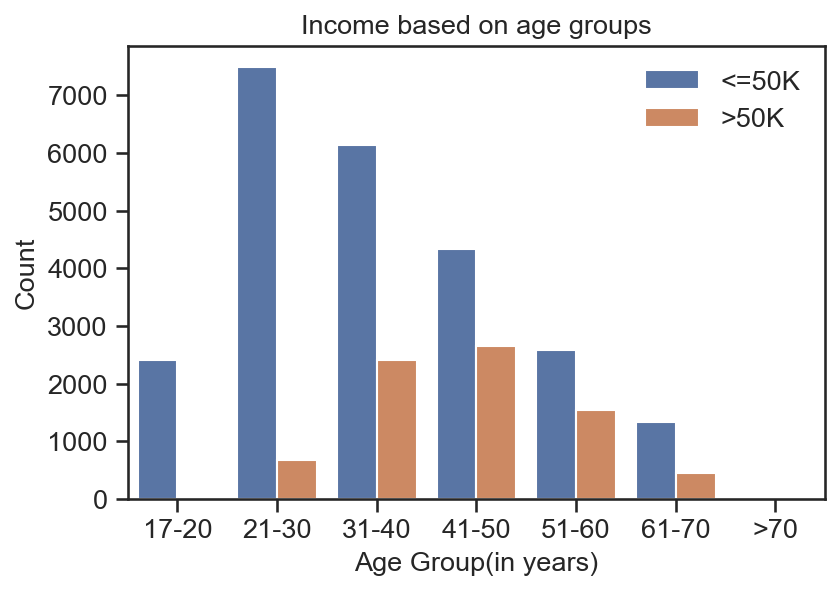

In [33]:
order_list = ['17-20','21-30', '31-40', '41-50', '51-60', '61-70', '>70']
sns.countplot(df['age_group'], hue = df['salary'], order = order_list)
plt.title('Income based on age groups', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age Group(in years)', size=13)
plt.ylabel('Count', size=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)

In [34]:
df['occupation'].replace([' Adm-clerical',' Exec-managerial'], 'Office',inplace=True)

df['occupation'].replace([' Farming-fishing',' Handlers-cleaners',' Machine-op-inspct',' Craft-repair', ' Transport-moving'], 'Laborer',inplace=True)

df['occupation'].replace([' Other-service',' Priv-house-serv', ' Protective-serv',' Tech-support',' Armed-Forces'],'Service',inplace=True)

df['occupation'].replace([' Prof-specialty'],'Professional',inplace=True)

df['occupation'].replace([' Unspecified',' ?'], 'Unknown',inplace=True)


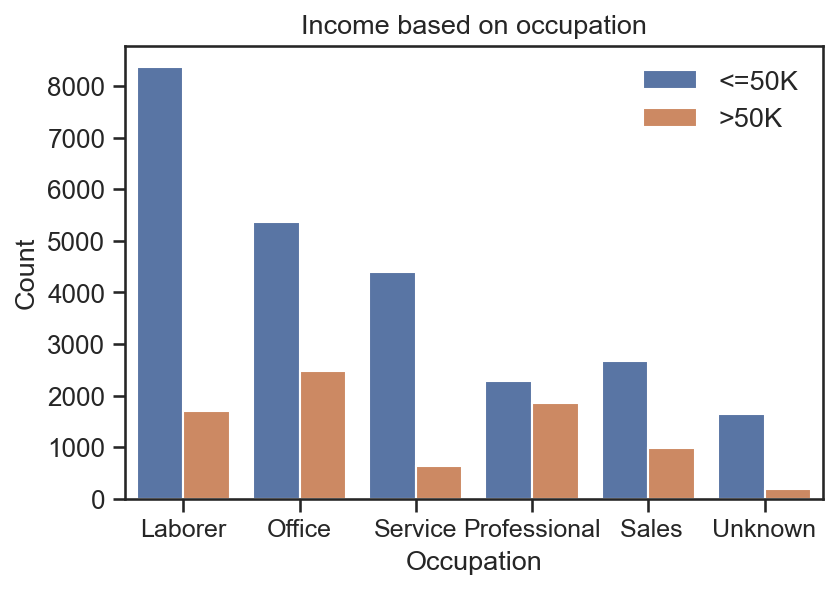

In [35]:
sns.countplot(df['occupation'], hue = df['salary'].replace({0: '<=15K', 1: '>15K'}), order=df['occupation'].value_counts().index)
plt.title('Income based on occupation', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12.5)
plt.xlabel('Occupation', size=13)
plt.ylabel('Count', size=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)

In [36]:
df['workclass'].replace(' Private', 'Private',inplace=True)
df['workclass'].replace([' Federal-gov',' Local-gov',' State-gov'], 'Government',inplace=True)
df['workclass'].replace([' Self-emp-not-inc', ' Self-emp-inc'],'Self-Employed', inplace=True)

df['workclass'].replace([' ?',' Never-worked',' Without-pay'], 'Other',inplace=True)
df['workclass'].unique()

array(['Government', 'Self-Employed', 'Private', 'Other'], dtype=object)

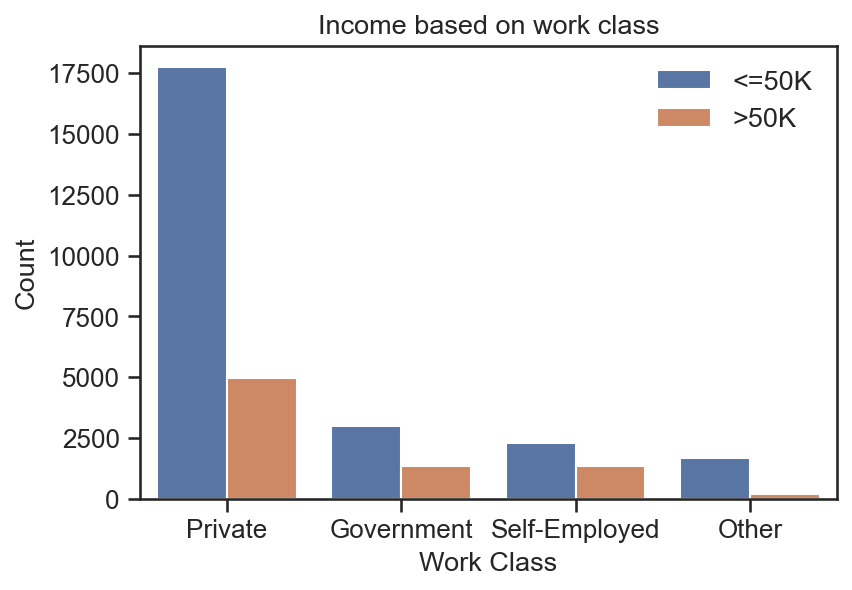

In [37]:
sns.countplot(df['workclass'], hue = df['salary'].replace({0: '<=15K', 1: '>15K'}), order=df['workclass'].value_counts().index)
plt.title('Income based on work class', fontsize=13)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.xlabel('Work Class', size=13)
plt.ylabel('Count', size=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)

In [38]:
def work_level(x):
    x = int(x)
    x = abs(x)
    if ( 0 < x <=25 ):
        return "Part Time"
    if ( 25 < x <=40 ):
        return "Full Time"
    else:
        return "Maximum"

df['work_type'] = df['hrs_per_week'].apply(work_level)

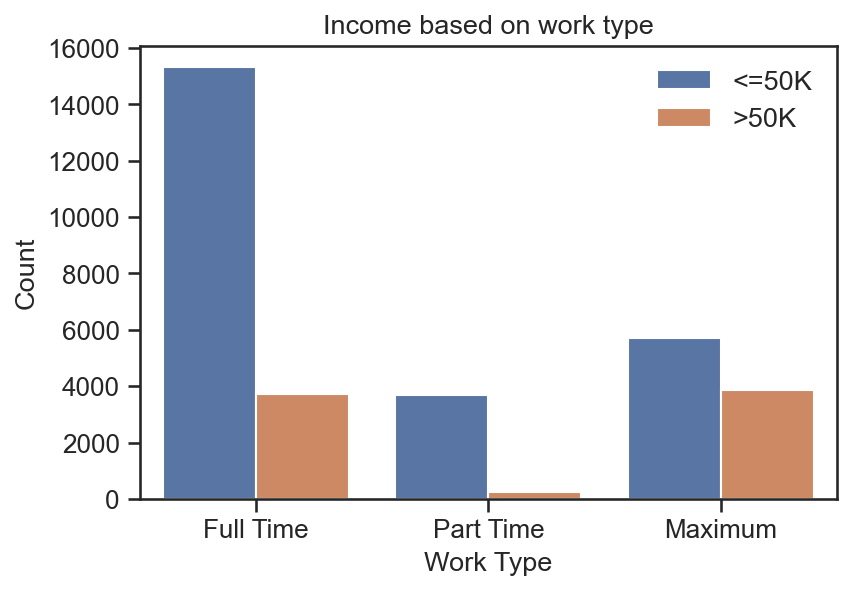

In [39]:
sns.countplot(df['work_type'], hue = df['salary'].replace({0: '<=15K', 1: '>15K'})) #, order=df['work_type'].value_counts().index)
plt.title('Income based on work type', fontsize=13)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.xlabel('Work Type', size=13)
plt.ylabel('Count', size=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)

In [40]:
df[['native_country', 'race']].groupby(['native_country'], as_index=False).count()

,native_country,race
0,Asian,751
1,European,521
2,North American,1399
3,Other countries,583
4,South American,137
5,United States,29170


## Percentage Proportion

Text(0, 0.5, 'Proportion of population')

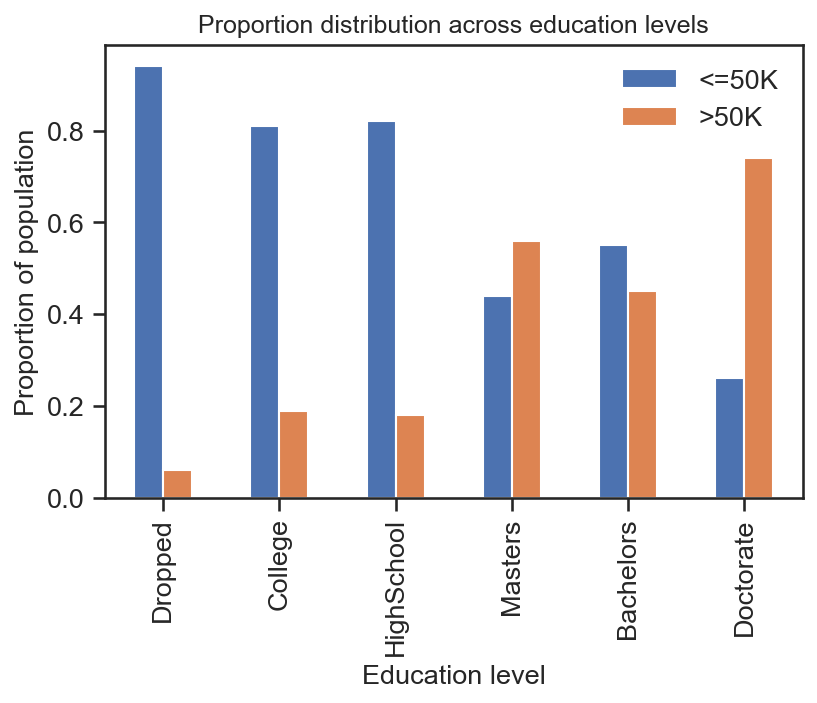

In [41]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df[['yrs_education','level_education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x
    
education = round(pd.crosstab(df.level_education, df.salary).div(pd.crosstab(df.level_education, df.salary).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))
ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', fontsize=13)
ax.legend( ['<=50K', '>50K'], frameon=False, fontsize=13)
ax.set_xlabel('Education level', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)


In [42]:
df['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'level_education', 'yrs_education',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'salary', 'age_group', 'work_type'],
      dtype='object')

In [44]:
x = pd.crosstab(df.level_education, df.salary)
x

salary,0,1
level_education,,
Bachelors,3287,2644
College,5904,1387
Doctorate,107,306
Dropped,4009,244
HighSchool,10649,2301
Masters,764,959


In [45]:
x['rich_per'] = x[1].values/(x[0].values+x[1].values)
x.sort_values(by='rich_per')

salary,0,1,rich_per
level_education,,,
Dropped,4009,244,0.057371
HighSchool,10649,2301,0.177683
College,5904,1387,0.190235
Bachelors,3287,2644,0.445793
Masters,764,959,0.556587
Doctorate,107,306,0.740920


Text(0, 0.5, 'Proportion of population')

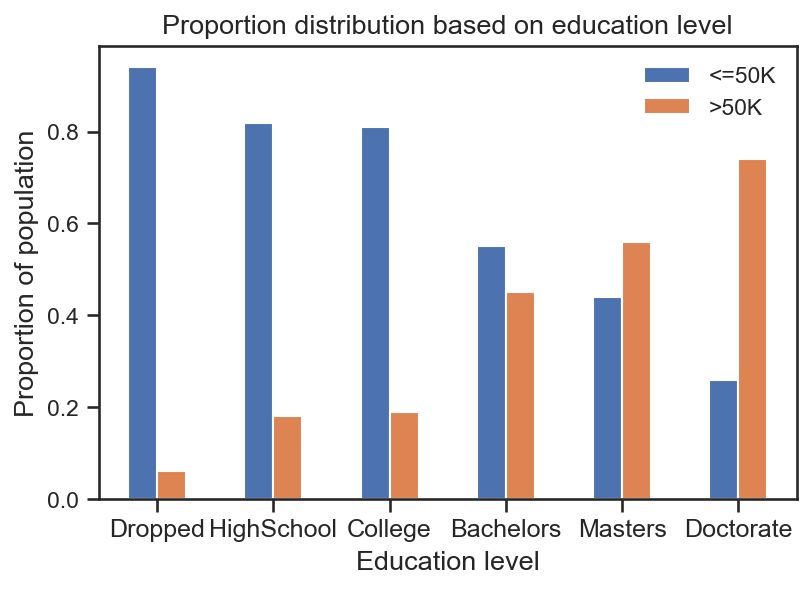

In [46]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df[['yrs_education','level_education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x
    
education = round(pd.crosstab(df.level_education, df.salary).div(pd.crosstab(df.level_education, df.salary).apply(sum,1),0),2)
education.sort_values(by = 1, inplace = True)

ax = education.plot(kind ='bar')
plt.title( 'Proportion distribution based on education level', fontsize=13)
ax.legend( ['<=50K', '>50K'], frameon=False)
plt.xticks(rotation=0, fontsize=12)
ax.set_xlabel('Education level', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)


Text(0, 0.5, 'Proportion of population')

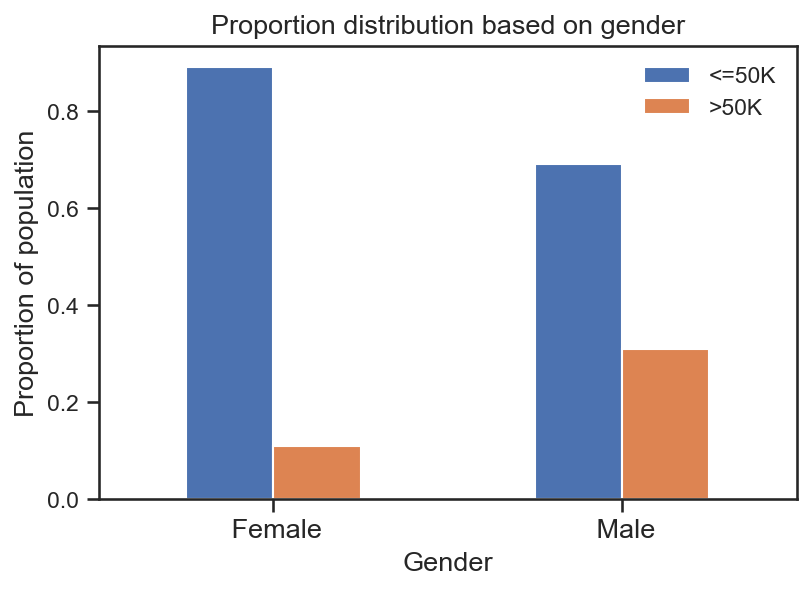

In [47]:
gender = round(pd.crosstab(df.sex, df.salary).div(pd.crosstab(df.sex, df.salary).apply(sum,1),0),2)
gender.sort_values(by = 1, inplace = True)
ax = gender.plot(kind ='bar')
plt.title( 'Proportion distribution based on gender', fontsize=13)
ax.legend( ['<=50K', '>50K'], frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Gender', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

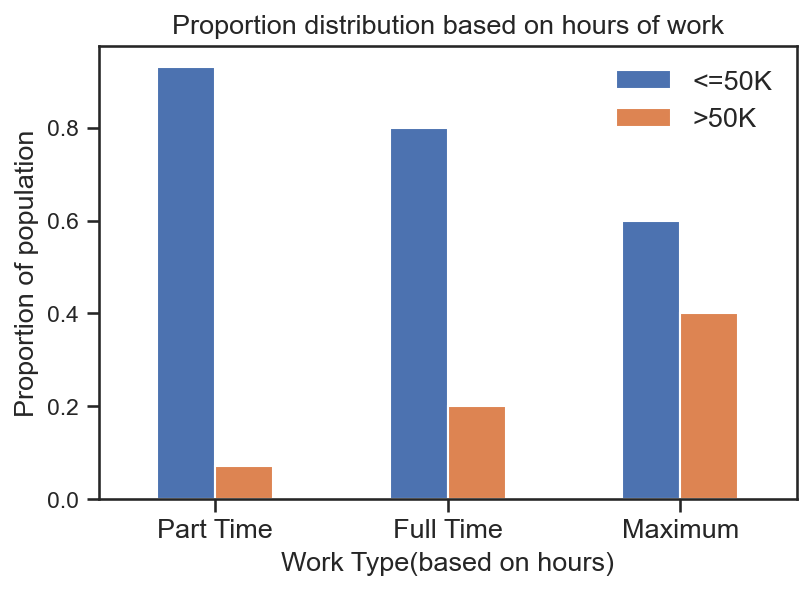

In [48]:
work_type = round(pd.crosstab(df.work_type, df.salary).div(pd.crosstab(df.work_type, df.salary).apply(sum,1),0),2)
work_type.sort_values(by = 1, inplace = True)
ax = work_type.plot(kind ='bar')
plt.title('Proportion distribution based on hours of work', fontsize=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Work Type(based on hours)', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'Government'),
  Text(3, 0, 'Self-Employed')])

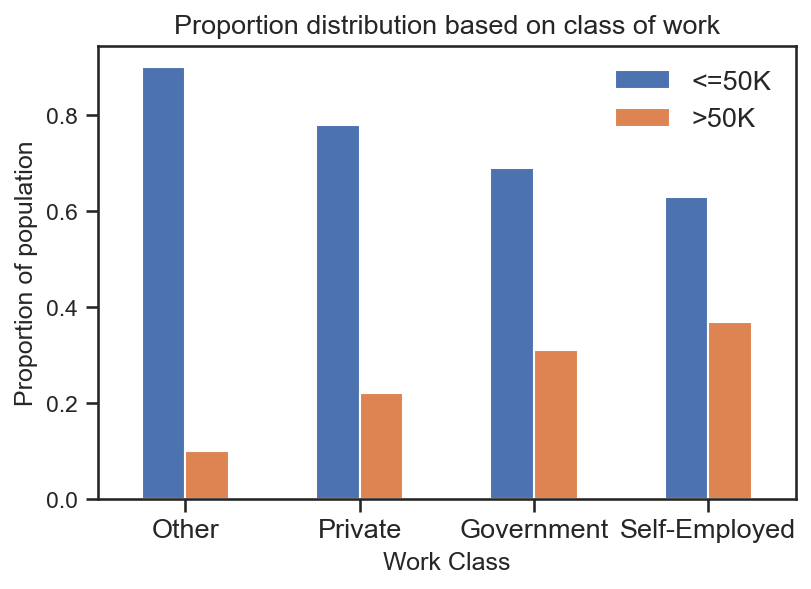

In [49]:
work_class = round(pd.crosstab(df.workclass, df.salary).div(pd.crosstab(df.workclass, df.salary).apply(sum,1),0),2)
work_class.sort_values(by = 1, inplace = True)
ax = work_class.plot(kind ='bar')
plt.title('Proportion distribution based on class of work',fontsize=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)
ax.set_xlabel('Work Class')
ax.set_ylabel('Proportion of population')
plt.xticks(rotation=0, fontsize=13)
# plt.yticks(fontsize=12)

Text(0, 0.5, 'Proportion of population')

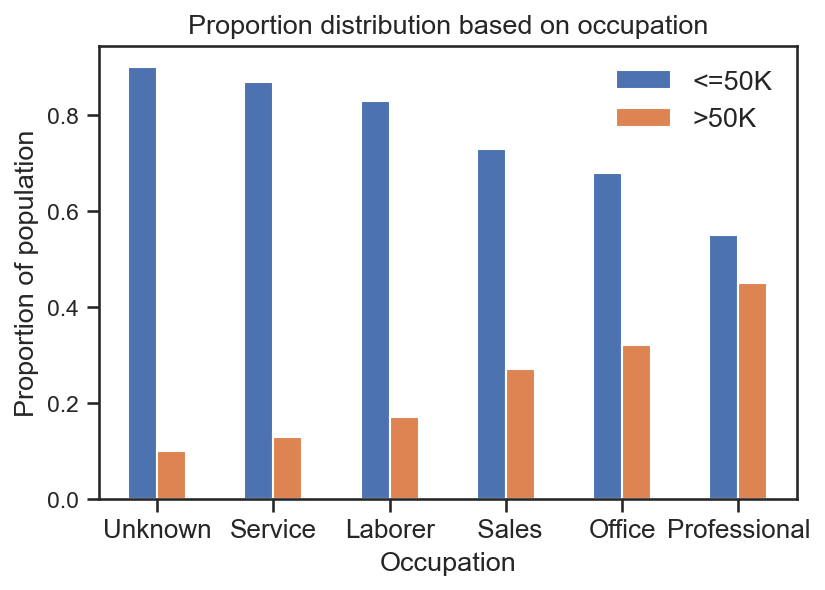

In [50]:
occupation = round(pd.crosstab(df.occupation, df.salary).div(pd.crosstab(df.occupation, df.salary).apply(sum,1),0),2)
occupation.sort_values(by = 1, inplace = True)
ax = occupation.plot(kind ='bar')
plt.xticks(rotation=0, fontsize=12.5)
plt.title('Proportion distribution based on occupation',fontsize=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)
plt.xlabel('Occupation',fontsize=13)
plt.ylabel('Proportion of population',fontsize=13)

Text(0, 0.5, 'Proportion of population')

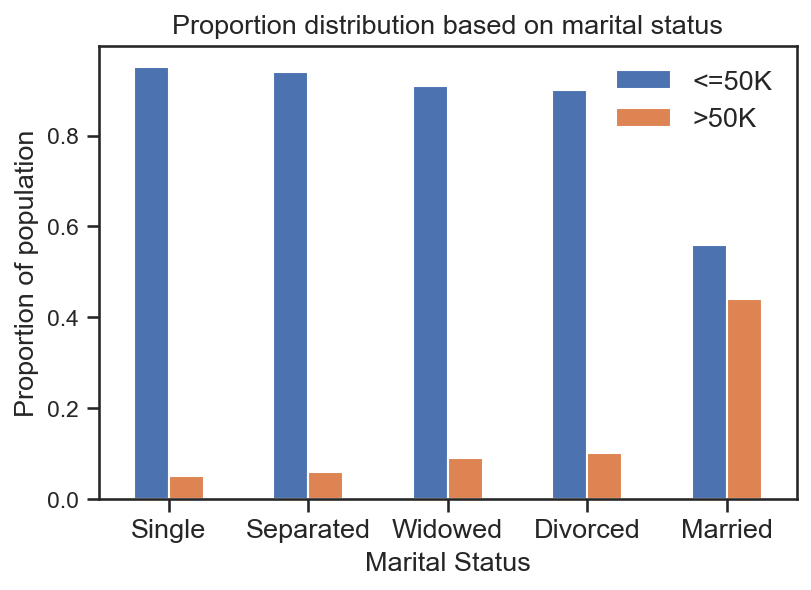

In [51]:
marital_status = round(pd.crosstab(df.marital_status, df.salary).div(pd.crosstab(df.marital_status, df.salary).apply(sum,1),0),2)
marital_status.sort_values(by = 1, inplace = True)
ax = marital_status.plot(kind ='bar')
plt.xticks(rotation=0, fontsize=13)
plt.title('Proportion distribution based on marital status',fontsize=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)
plt.xlabel('Marital Status',fontsize=13)
plt.ylabel('Proportion of population',fontsize=13)


Text(0, 0.5, 'Proportion of population')

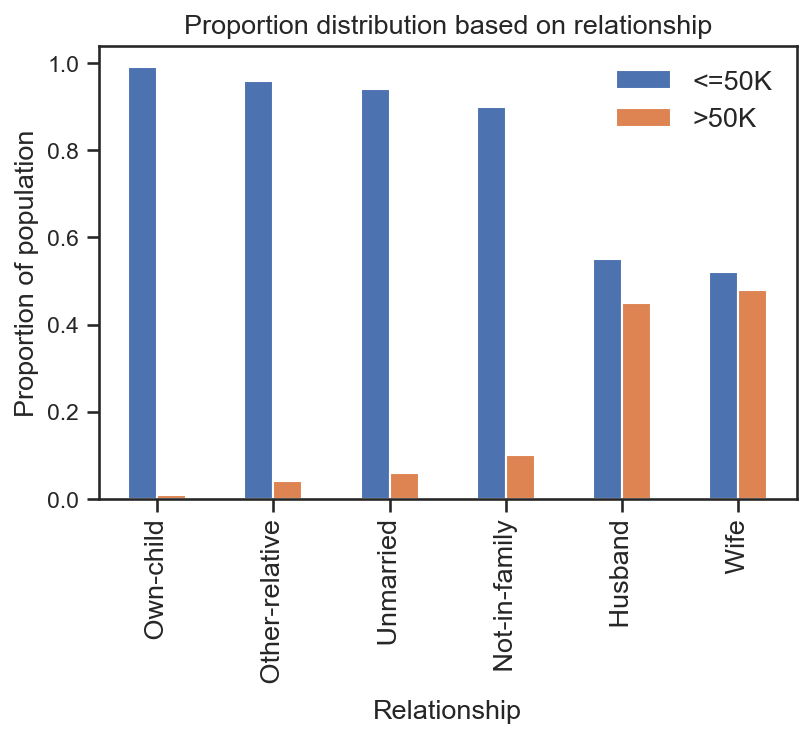

In [52]:
relationship_status = round(pd.crosstab(df.relationship, df.salary).div(pd.crosstab(df.relationship, df.salary).apply(sum,1),0),2)
relationship_status.sort_values(by = 1, inplace = True)
ax = relationship_status.plot(kind ='bar')
plt.xticks(rotation=90, fontsize=13)
plt.title('Proportion distribution based on relationship',fontsize=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)
plt.xlabel('Relationship',fontsize=13)
plt.ylabel('Proportion of population',fontsize=13)


Text(0, 0.5, 'Proportion of population')

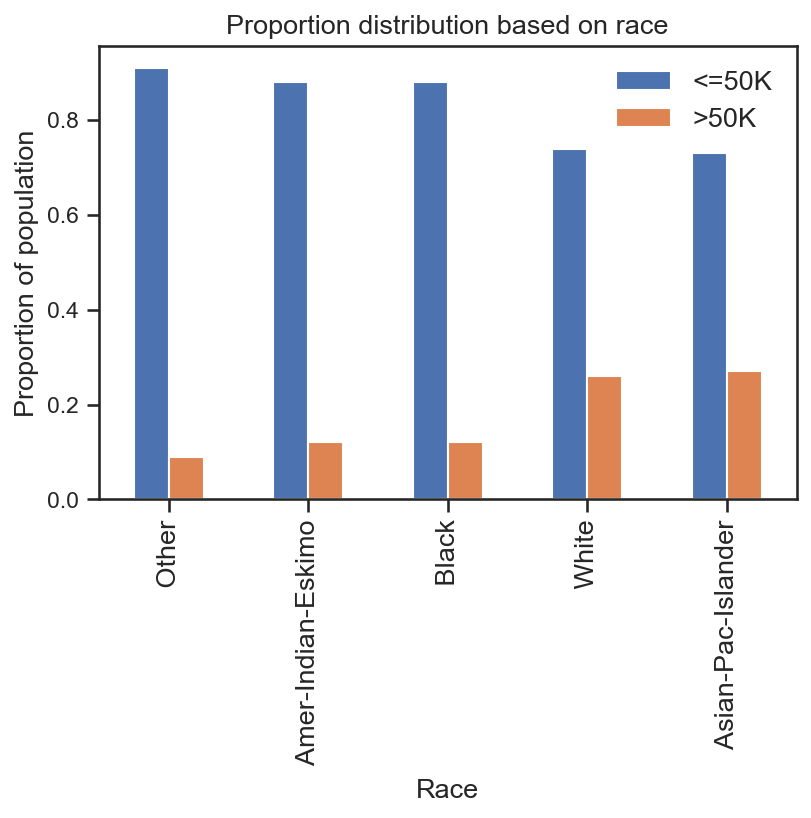

In [53]:
race_ = round(pd.crosstab(df.race, df.salary).div(pd.crosstab(df.race, df.salary).apply(sum,1),0),2)
race_.sort_values(by = 1, inplace = True)
ax = race_.plot(kind ='bar')
plt.xticks(rotation=90, fontsize=13)
plt.title('Proportion distribution based on race',fontsize=13)
plt.legend(["<=50K",">50K"],loc="upper right",fontsize=13, frameon=False)
plt.xlabel('Race',fontsize=13)
plt.ylabel('Proportion of population',fontsize=13)


In [54]:
df['age_group'].replace("Greater than 70",">70",inplace=True)

Text(0, 0.5, 'Proportion of population')

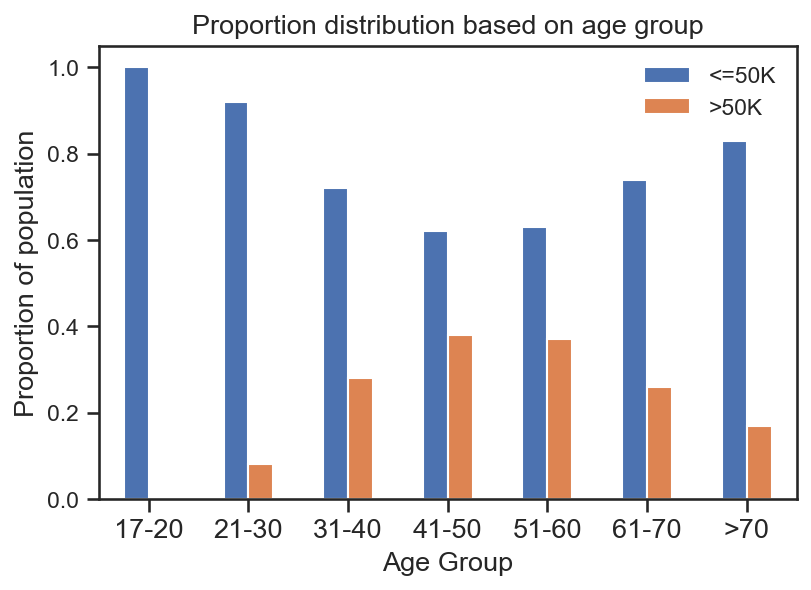

In [55]:
age_group = round(pd.crosstab(df.age_group, df.salary).div(pd.crosstab(df.age_group, df.salary).apply(sum,1),0),2)
# age_group.sort_values(by = 1, inplace = True)
ax = age_group.plot(kind ='bar')
plt.title( 'Proportion distribution based on age group', fontsize=13)
ax.legend( ['<=50K', '>50K'], frameon=False)
plt.xticks(rotation=0, fontsize=13)
ax.set_xlabel('Age Group', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

Text(0, 0.5, 'Proportion of population')

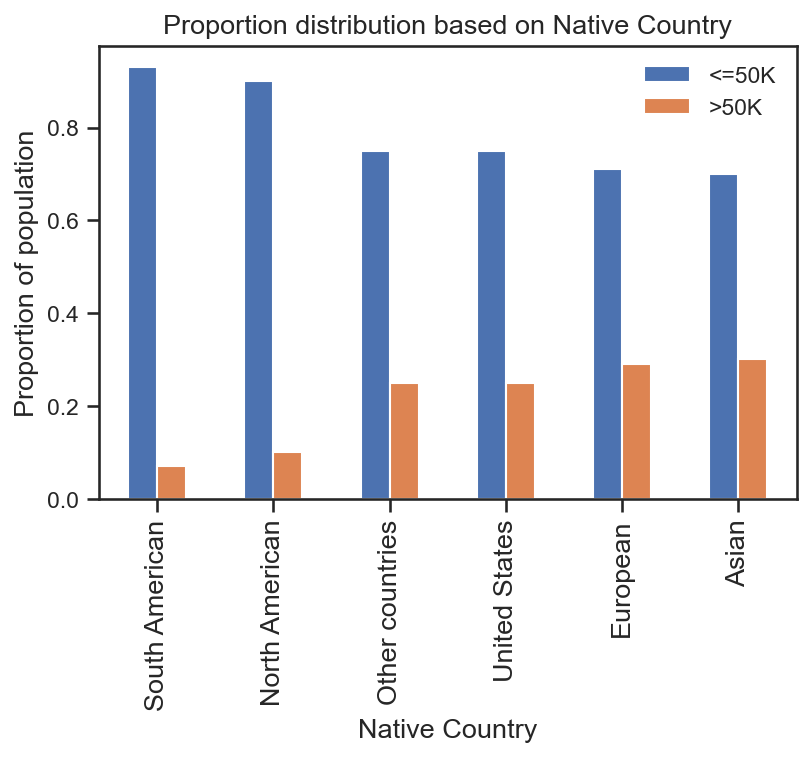

In [56]:
native_country = round(pd.crosstab(df.native_country, df.salary).div(pd.crosstab(df.native_country, df.salary).apply(sum,1),0),2)
native_country.sort_values(by = 1, inplace = True)
ax = native_country.plot(kind ='bar')
plt.title( 'Proportion distribution based on Native Country', fontsize=13)
ax.legend( ['<=50K', '>50K'], frameon=False)
plt.xticks(rotation=90, fontsize=13)
ax.set_xlabel('Native Country', fontsize=13)
ax.set_ylabel('Proportion of population', fontsize=13)

In [57]:
df['marital_status'].value_counts()

Married      15417
Single       10683
Divorced      4443
Separated     1025
Widowed        993
Name: marital_status, dtype: int64

### LabelEncoding the categorical columns

In [58]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'level_education', 'yrs_education',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'salary', 'age_group', 'work_type'],
      dtype='object')

In [59]:
"""Correcting data types, converting into categorical variables."""
df.loc[:, ["age_group", "sex","workclass","level_education","marital_status","occupation","race","native_country","work_type"]]\
= df.loc[:, ["age_group", "sex","workclass","level_education","marital_status","occupation","race","native_country","work_type"]]\
.astype('category')

In [60]:
df.dtypes

age                   int64
workclass          category
fnlwgt                int64
level_education    category
yrs_education         int64
marital_status     category
occupation         category
relationship         object
race               category
sex                category
capital_gain          int64
capital_loss          int64
hrs_per_week        float64
native_country     category
salary                int64
age_group          category
work_type          category
dtype: object

### Columns to Select

- sex --> relationship
- salary --> relationship
- marital_status --> Age, relationship
- Age --> marital_status
- relationship --> marital_status, sex, salary


- Workclass --> occupation
- yrs_education --> level_education
- level_education --> yrs_education, occupation
- occupation --> Workclass, level_education


- race --> native_country
- native_country --> race


- capital_gain has 29849 (91.7%) zeros	Zeros
- capital_loss has 31042 (95.3%) zeros	Zeros


Sex, Marital Status, Age_Group, Workclass, Occupation, Level_Education, Race

In [61]:
from sklearn.preprocessing import LabelEncoder

selected_columns = ["sex", "age_group","marital_status","level_education",
                   "occupation","workclass","work_type","race","salary"]

df[selected_columns]

,sex,age_group,marital_status,level_education,occupation,workclass,work_type,race,salary
0,Male,31-40,Single,Bachelors,Office,Government,Full Time,White,0
1,Male,41-50,Married,Bachelors,Office,Self-Employed,Part Time,White,0
2,Male,31-40,Divorced,HighSchool,Laborer,Private,Full Time,White,0
3,Male,51-60,Married,Dropped,Laborer,Private,Full Time,Black,0
4,Female,21-30,Married,Bachelors,Professional,Private,Full Time,Black,0
...,...,...,...,...,...,...,...,...,...
32556,Female,21-30,Married,HighSchool,Service,Private,Full Time,White,0
32557,Male,31-40,Married,HighSchool,Laborer,Private,Full Time,White,1
32558,Female,51-60,Widowed,HighSchool,Office,Private,Full Time,White,0
32559,Male,21-30,Single,HighSchool,Office,Private,Part Time,White,0


In [62]:
df_train = pd.get_dummies(df[selected_columns])
df_train

,salary,sex_ Female,sex_ Male,age_group_17-20,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_61-70,age_group_>70,...,workclass_Private,workclass_Self-Employed,work_type_Full Time,work_type_Maximum,work_type_Part Time,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
32557,1,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
32558,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
32559,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


<AxesSubplot:>

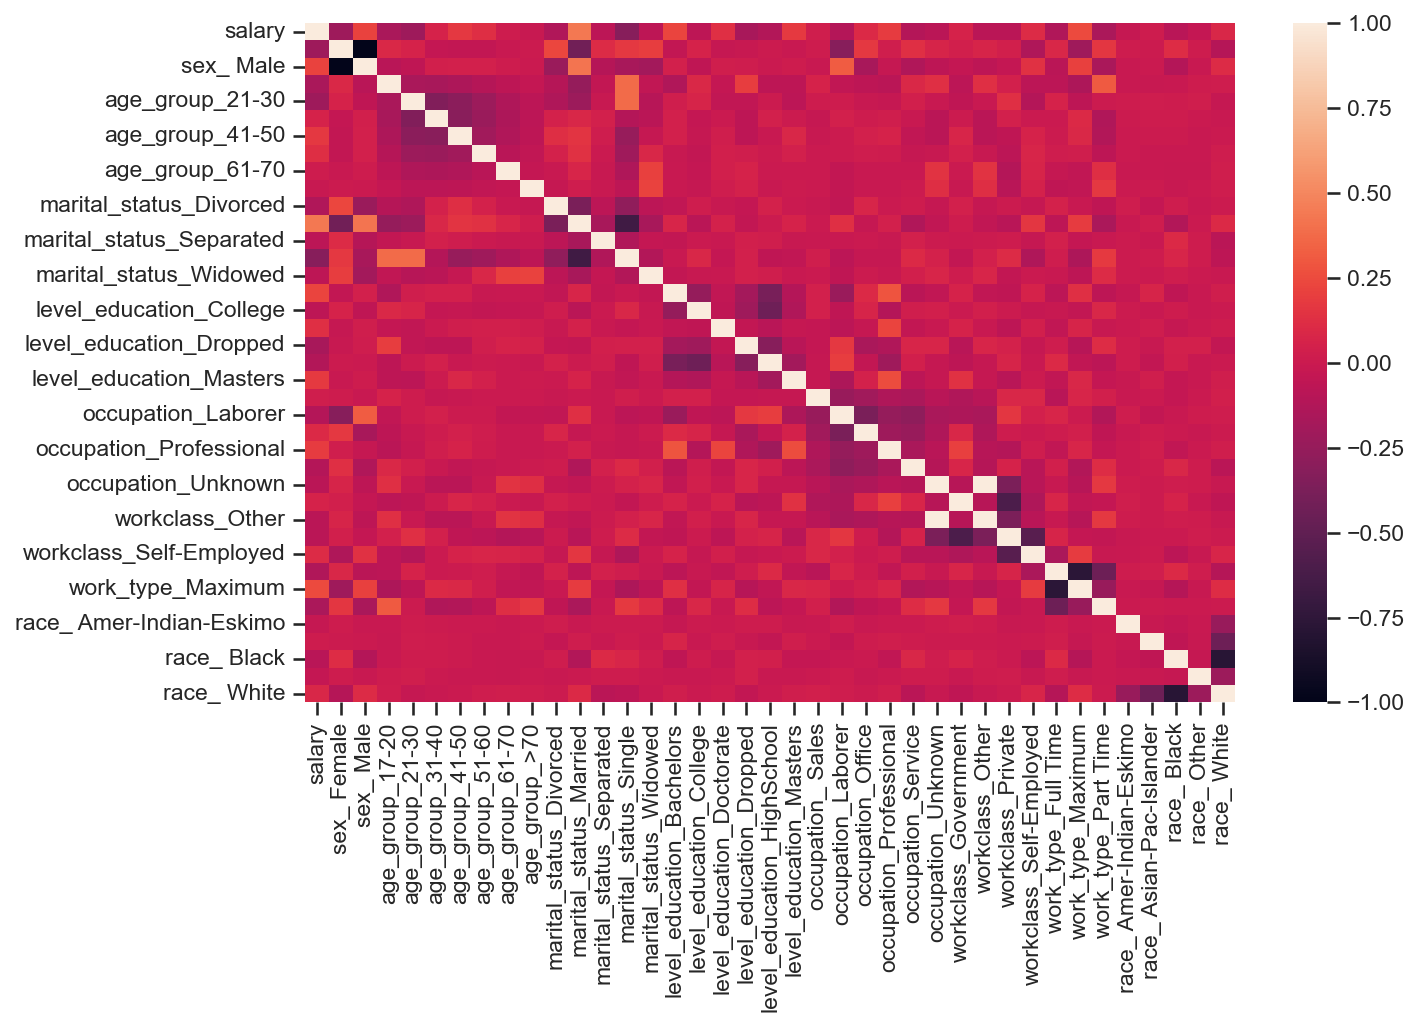

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr())

In [66]:
df_train

,salary,sex_ Female,sex_ Male,age_group_17-20,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_61-70,age_group_>70,...,workclass_Private,workclass_Self-Employed,work_type_Full Time,work_type_Maximum,work_type_Part Time,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
32557,1,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
32558,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
32559,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


## Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

# X values 
X = df_train.drop(['salary'], axis=1)
y = df_train['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [81]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Number of mislabeled points", (y_test != y_pred).sum())

Number of mislabeled points 1686


In [85]:
from sklearn.metrics import classification_report


target_names = ['Income <=50K', 'Income >50K']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Income <=50K       0.93      0.71      0.81      4945
 Income >50K       0.48      0.83      0.61      1568

    accuracy                           0.74      6513
   macro avg       0.70      0.77      0.71      6513
weighted avg       0.82      0.74      0.76      6513



## SMOTE Sampling

```
SMOTE sampling utilizes k-nearest neighbour algorithm to create synthetic data. 
- Compute the distance between the two sample points
- Multiply the distance with a random number between 0 and 1.
- Identify a new point on the line segment at the computed distance.
- Repeat the process for identified feature vectors.
```